<a href="https://colab.research.google.com/github/alvinkur/Scientific-Computing/blob/main/AOL_SC_Alvin_2802415435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AOL SCIENTIFIC COMPUTING - ALVIN KURNIAWAN ALIANTO (2802415435)**

Nama: Alvin Kurniawan Alianto

NIM: 2802415435

**QUESTION 1**

You must find the trend on the bag’s production from the data. You must provide a mathematical model that can explain the production’s trend accurately. Since your supervisor want an accurate model, you must avoid any linear approach to build the trend model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, root_scalar

from google.colab import files
uploaded = files.upload()

import os
os.listdir()

# Load the uploaded CSV
df = pd.read_csv('aol_data_sc.csv')
print(df.head())

Saving aol_data_sc.csv to aol_data_sc.csv
     M1    M2    M3    M4    M5    M6    M7    M8    M9   M10  ...   M135  \
0  1863  1614  2570  1685  2101  1811  2457  2171  2134  2502  ...  14917   

    M136   M137   M138   M139   M140   M141   M142   M143   M144  
0  15046  15556  15893  16388  16782  16716  17033  16896  17689  

[1 rows x 144 columns]


Model: P(t) = 0.003863*t^3 + -0.134357*t^2 + 47.223553*t + 1748.506723


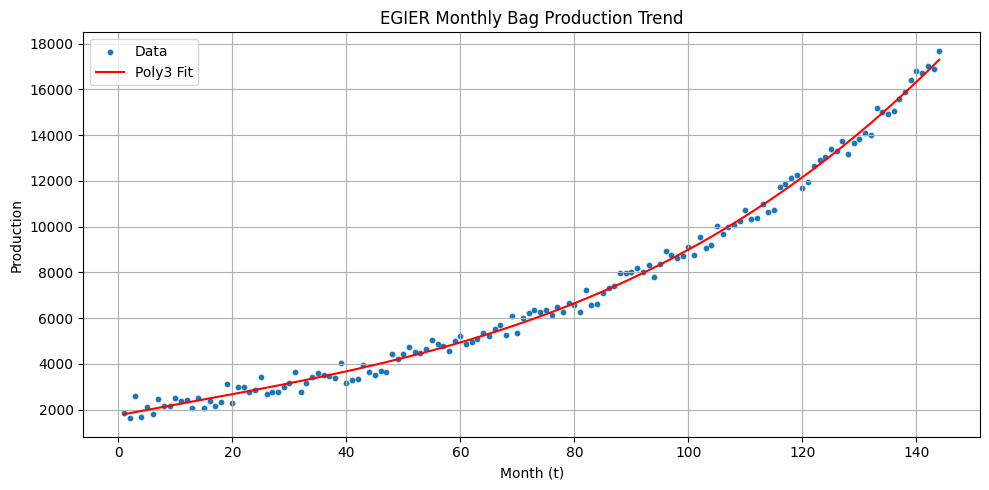

In [ ]:
months = np.arange(1, df.shape[1] + 1)
productions = df.iloc[0].values.astype(float)

def poly3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

params, _ = curve_fit(poly3, months, productions)
a, b, c, d = params
print(f"Model: P(t) = {a:.6f}*t^3 + {b:.6f}*t^2 + {c:.6f}*t + {d:.6f}")

# Plot trend
plt.figure(figsize=(10, 5))
plt.scatter(months, productions, label="Data", s=10)
plt.plot(months, poly3(months, *params), color='red', label="Poly3 Fit")
plt.title("EGIER Monthly Bag Production Trend")
plt.xlabel("Month (t)")
plt.ylabel("Production")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def production_model(t):
    return a * t**3 + b * t**2 + c * t + d

residuals = productions - production_model(months)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((productions - np.mean(productions))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R² of the model: {r_squared:.4f}")


R² of the model: 0.9956


QUESTION 2

Since you’ll need to process the data using a computer program, you’ll need to convert the mathematical model from problem #1 to its numerical form (approximation). This is done so that the mathematical model can be calculated by the program easily. Since accuracy is still important, make sure that your conversion is accurate as possible. Provide an explanation to your supervisor about the accuracy of your conversion.

=== KONVERSI MODEL PRODUKSI ===
Model: f(t) = -0.005420 * t³ + 0.788635 * t² + 115.764536 * t + 11327.545105
RMSE: 943.721
R²: 0.9699


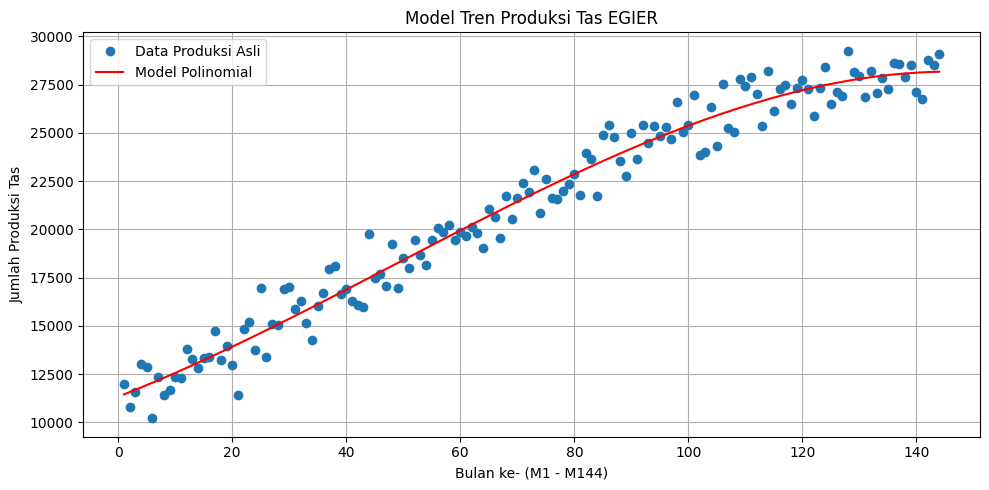

In [4]:
coeffs = np.polyfit(months, productions, 3)
a, b, c, d = coeffs

# Konversi menjadi fungsi numerik
def production_model(x):
    return a * x**3 + b * x**2 + c * x + d

# === 3. EVALUASI MODEL ===
predicted = production_model(months)
residuals = productions - predicted

# RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean(residuals**2))

# R² (koefisien determinasi)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((productions - np.mean(productions))**2)
r_squared = 1 - (ss_res / ss_tot)

# === 4. OUTPUT HASIL ===
print("=== KONVERSI MODEL PRODUKSI ===")
print(f"Model: f(t) = {a:.6f} * t³ + {b:.6f} * t² + {c:.6f} * t + {d:.6f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r_squared:.4f}")

# === 5. GRAFIK TREND ===
plt.figure(figsize=(10, 5))
plt.plot(months, productions, 'o', label='Data Produksi Asli')
plt.plot(months, predicted, 'r-', label='Model Polinomial')
plt.title("Model Tren Produksi Tas EGIER")
plt.xlabel("Bulan ke- (M1 - M144)")
plt.ylabel("Jumlah Produksi Tas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

QUESTION 3

The warehouse was designed to be able to store a maximum of 25,000 (twenty five thousands) bags at each month. Your supervisor asked you to provide a prediction when do EGIER need to build a new warehouse based on the trend that you have acquired in problem #2. To build a new warehouse, it is predicted that they need at least 13 months. So provide the time when EIGER need to start building their new warehouse.
(Hint: this can be approached as a root of equation problem).

In [ ]:
def to_solve(t):
    return production_model(t + 13) - 25000

sol = root_scalar(to_solve, bracket=[145, 250], method='brentq')

if sol.converged:
    t_now = int(np.floor(sol.root))
    print(f"Prediction: Start building warehouse at Month {t_now} (production at Month {t_now + 13} reaches 25,000)")
else:
    print("Could not find a valid solution.")

Prediction: Start building warehouse at Month 157 (production at Month 170 reaches 25,000)
